In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Missing data visualization
import missingno as msno

# Machine learning preprocessing and modeling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Statistical scoring
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [2]:
original = pd.read_csv('train.csv')
df = original.copy()
df.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [17]:
df['patient_id'].value_counts()

88785891    33
1660293     19
84428613    18
37096866    17
97391007    15
            ..
79094196     1
76337586     1
46057905     1
24523182     1
85331970     1
Name: patient_id, Length: 53985, dtype: int64

# 1. EDA & PreProcessing

In [165]:
print(df.columns)
print(df.shape)

Index(['encounter_id', 'country', 'patient_id', 'race', 'gender', 'age',
       'weight', 'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')
(71236, 31)


In [166]:
target_cols = [
    'readmitted_binary',
    'readmitted_multiclass'
]

id_cols = [
    'encounter_id',
    'patient_id'
]

numerical_cols = [
    'average_pulse_bpm',
    'outpatient_visits_in_previous_year',
    'emergency_visits_in_previous_year',
    'inpatient_visits_in_previous_year',
    'length_of_stay_in_hospital',
    'number_lab_tests',
    'non_lab_procedures',
    'number_of_medications',
    'number_diagnoses'
]

categorical_cols = [
    'country',
    'race',
    'gender',
    'age',  # age bracket
    'weight', # weight bracket
    'payer_code',
    'admission_type',
    'medical_specialty',
    'discharge_disposition',
    'admission_source',
    'primary_diagnosis',
    'secondary_diagnosis',
    'additional_diagnosis',
    'glucose_test_result',
    'a1c_test_result',
    'change_in_meds_during_hospitalization',
    'prescribed_diabetes_meds',
    'medication'
]

* __'encounter_id'__ -> clean ✅

Unique identifier of the encounter

In [167]:
df['encounter_id'].value_counts(dropna=False)

133119    1
590325    1
125416    1
909801    1
651755    1
         ..
558394    1
171321    1
955704    1
690410    1
655360    1
Name: encounter_id, Length: 71236, dtype: int64

In [168]:
len(set(df['encounter_id']))

71236

In [169]:
df['encounter_id'].dtype

dtype('int64')

* __'country'__ -> clean ✅

In [170]:
df['country'].value_counts(dropna=False)
# Drop! Univariate

USA    71236
Name: country, dtype: int64

In [171]:
df['country'].dtype

dtype('O')

In [172]:
df = df.drop(columns=['country'])

* __'patient_id'__ -> clean✅

Identifier of the patient

In [173]:
df['patient_id'].value_counts(dropna=False) 

88785891    33
1660293     19
84428613    18
37096866    17
97391007    15
            ..
79094196     1
76337586     1
46057905     1
24523182     1
85331970     1
Name: patient_id, Length: 53985, dtype: int64

In [174]:
len(set(df['patient_id']))

53985

In [175]:
df['patient_id'].isna().sum()

0

In [176]:
df['patient_id'].dtype

dtype('int64')

* __'race'__ -> clean❗ (minor adjustment)

In [177]:
df['race'].value_counts(dropna=False)

Caucasian          50693
AfricanAmerican    12693
NaN                 3554
?                   1516
Hispanic            1364
Other                995
Asian                421
Name: race, dtype: int64

In [178]:
# Assigning '?' as missing values
df['race'] = df['race'].replace('?',np.nan)

# Impute Mode -> 'Caucasian'
df['race'] = df['race'].replace(np.nan,'Caucasian')

df['race'].value_counts()

Caucasian          55763
AfricanAmerican    12693
Hispanic            1364
Other                995
Asian                421
Name: race, dtype: int64

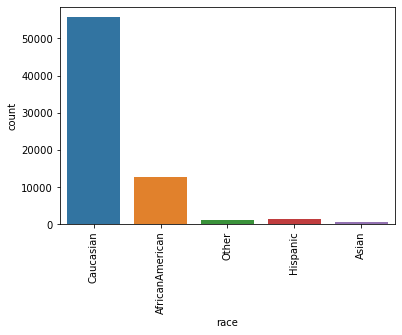

In [179]:
sns.countplot(x=df['race'])
plt.xticks(rotation=90)
plt.show()

* __gender__ -> clean✅

In [180]:
df['gender'].value_counts(dropna=False) # Drop unknown

Female             38228
Male               33005
Unknown/Invalid        3
Name: gender, dtype: int64

In [181]:
df['gender'] = df['gender'].replace('Unknown/Invalid',np.nan)
df.dropna(subset=['gender'], inplace=True)

In [182]:
df['gender'].dtype

dtype('O')

In [183]:
df['gender'].value_counts(dropna=False)

Female    38228
Male      33005
Name: gender, dtype: int64

* __age__ -> clean ❗ (required adjustment)

In [184]:
df['age'].value_counts(dropna=False)

[70-80)     17357
[60-70)     14907
[80-90)     11510
[50-60)     11423
[40-50)      6418
NaN          3557
[30-40)      2536
[90-100)     1875
[20-30)      1071
[10-20)       474
[0-10)        105
Name: age, dtype: int64

In [185]:
df['age'].dtype

dtype('O')

In [186]:
# Set as type 'category'
df['age'] = df['age'].astype('category')

# Order categories based on values
df['age'] = df['age'].cat.reorder_categories(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)',
                            '[80-90)','[90-100)'],ordered=True)

df['age'].value_counts(dropna=False)

[70-80)     17357
[60-70)     14907
[80-90)     11510
[50-60)     11423
[40-50)      6418
NaN          3557
[30-40)      2536
[90-100)     1875
[20-30)      1071
[10-20)       474
[0-10)        105
Name: age, dtype: int64

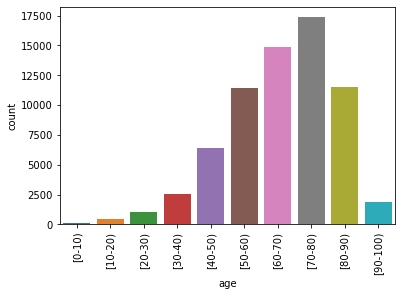

In [187]:
sns.countplot(x=df['age'])
plt.xticks(rotation=90)
plt.show()

In [188]:
df['age'] = df['age'].fillna('[70-80)')

In [189]:
df['age'].isna().sum()

0

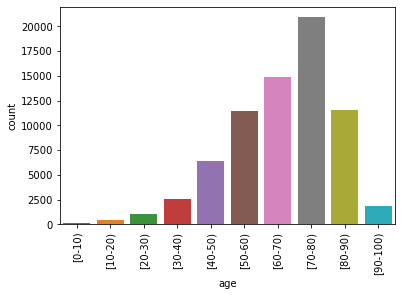

In [190]:
sns.countplot(x=df['age'])
plt.xticks(rotation=90)
plt.show()

* __'weight'__ -> clean ❗ (required adjustment)

In [191]:
df['weight'].value_counts(dropna=False)
# Too many '?' (missing values) to consider dropping

?            68987
[75-100)       933
[50-75)        636
[100-125)      449
[125-150)       96
[25-50)         67
[0-25)          35
[150-175)       21
[175-200)        7
>200             2
Name: weight, dtype: int64

In [192]:
## Assign '?' as missing values
#df['weight'] = df['weight'].replace('?',np.nan)
#
## Set as type 'category'
#df['weight'] = df['weight'].astype('category')
#
## Order categories based on values
#df['weight'] = df['weight'].cat.reorder_categories(['[0-25)','[25-50)','[50-75)','[75-100)','[100-125)',
#                                                   '[125-150)','[150-175)','[175-200)','>200'],ordered=True)
#
#
#df['weight'].value_counts(dropna=False)

In [193]:
df = df.drop(columns=['weight'])

* __'payer_code'__ -> clean ❗ (required adjustment)

Code of the health insurance provider (if there is one)

In [194]:
df['payer_code'].value_counts(dropna=False)

?     28200
MC    22683
HM     4319
SP     3541
BC     3292
MD     2484
CP     1760
UN     1733
CM     1347
OG      729
PO      405
DM      378
CH      102
WC       99
OT       61
MP       54
SI       45
FR        1
Name: payer_code, dtype: int64

In [195]:
# Assign '?' as a missing value
df['payer_code'] = df['payer_code'].replace('?',np.nan)

# Encode Nan value as no insurance (0) and otherwise (1)
df['payer_code'] = df['payer_code'].notna().astype(int)

In [196]:
# Assign feature as categorical
df['payer_code'] = df['payer_code'].astype('category') 

In [197]:
df['payer_code'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [198]:
df['payer_code'].value_counts(dropna=False)

1    43033
0    28200
Name: payer_code, dtype: int64

* __outpatient_visits_in_previous_year__ -> clean ✅

Number of outpatient visits (visits made with the intention
of leaving on the same day) the patient made to the hospital
in the year preceding the encounter

In [199]:
df['outpatient_visits_in_previous_year'].value_counts(dropna=False)

0     59584
1      5967
2      2465
3      1431
4       760
5       370
6       212
7       107
8        67
9        59
10       46
11       29
13       23
12       21
15       17
14       16
16       12
17        5
21        5
20        5
18        4
22        4
24        3
27        3
35        2
23        2
25        2
29        2
39        1
38        1
37        1
36        1
28        1
34        1
33        1
19        1
26        1
42        1
Name: outpatient_visits_in_previous_year, dtype: int64

In [200]:
len(df['outpatient_visits_in_previous_year'])

71233

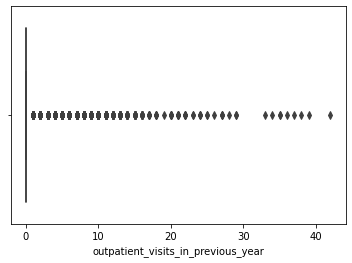

In [201]:
sns.boxplot(x=df['outpatient_visits_in_previous_year'])
plt.show()

In [202]:
# Calculate the Z-score for each data point in the column. 
# Points with a high absolute Z-score (typically > 3 or < -3) are considered outliers.
z_scores = zscore(df['outpatient_visits_in_previous_year'])
outliers = (abs(z_scores) > 3)

# Identify and print the outliers
print(len(df['outpatient_visits_in_previous_year'][outliers]))
# Drop? 

1026


In [203]:
df['outpatient_visits_in_previous_year'].dtype

dtype('int64')

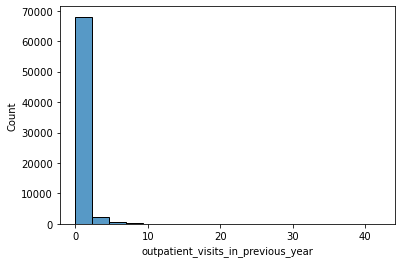

In [204]:
sns.histplot(x='outpatient_visits_in_previous_year',data=df)
plt.show()

* __emergency_visits_in_previous_year__ -> clean ✅

Number of emergency visits the patient made to the hospital
in the year preceding the encounter

In [205]:
df['emergency_visits_in_previous_year'].value_counts(dropna=False).sort_values()

63        1
76        1
24        1
15        1
28        1
29        1
37        1
25        1
42        1
21        2
19        2
14        3
18        3
16        3
20        3
22        5
12        9
13       10
9        18
11       18
8        23
10       24
7        47
6        71
5       126
4       262
3       502
2      1432
1      5422
0     63239
Name: emergency_visits_in_previous_year, dtype: int64

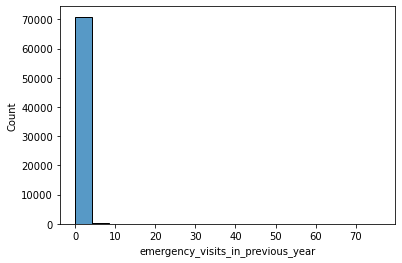

In [206]:
sns.histplot(x='emergency_visits_in_previous_year',data=df)
plt.show()

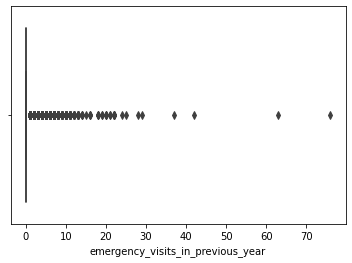

In [207]:
sns.boxplot(x=df['emergency_visits_in_previous_year'])
plt.show()

In [208]:
# Calculate the Z-score for each data point in the column. 
# Points with a high absolute Z-score (typically > 3 or < -3) are considered outliers.
z_scores = zscore(df['emergency_visits_in_previous_year'])
outliers = (abs(z_scores) > 3)

# Identify and print the outliers
print(len(df['emergency_visits_in_previous_year'][outliers]))
# Drop? 

1140


* __inpatient_visits_in_previous_year__ -> clean ✅

Number of inpatient visits (visits with the intention to stay
overnight) the patient made to the hospital in the year
preceding the encounter

In [209]:
df['inpatient_visits_in_previous_year'].value_counts(dropna=False)

0     47228
1     13706
2      5303
3      2407
4      1159
5       553
6       361
7       195
8       109
9        81
10       42
11       33
12       25
13       15
14        4
15        4
16        3
19        2
17        1
18        1
21        1
Name: inpatient_visits_in_previous_year, dtype: int64

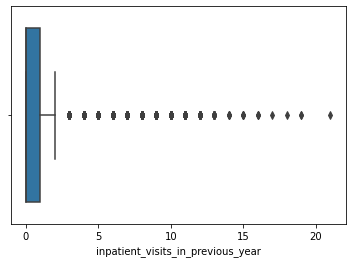

In [210]:
sns.boxplot(x=df['inpatient_visits_in_previous_year'])
plt.show()

In [211]:
# Calculate the Z-score for each data point in the column. 
# Points with a high absolute Z-score (typically > 3 or < -3) are considered outliers.
z_scores = zscore(df['inpatient_visits_in_previous_year'])
outliers = (abs(z_scores) > 3)

# Identify and print the outliers
print(len(df['inpatient_visits_in_previous_year'][outliers]))
# Drop? 

1430


In [212]:
df['inpatient_visits_in_previous_year'].dtype

dtype('int64')

* __admission_type__ -> clean ❗ (required adjustment)

Type of admission of the patient (e.g. Emergency, Urgent,
etc...)

In [213]:
df['admission_type'].value_counts(dropna=False)
# Missing values somewhat correlated with 'admission source' which makes sense given context

Emergency        37740
Elective         13210
Urgent           13024
NaN               3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: admission_type, dtype: int64

In [214]:
len(df[df['admission_type']=='Not Available'])+df['admission_type'].isna().sum()
# Both ways missing data is represented

7026

In [215]:
df['admission_type']=df['admission_type'].replace(np.nan,'Not Available')
# Categorize missing values as 'Not available' -> maybe useful for analysis
df['admission_type']=df['admission_type'].replace('Not Mapped','Not Available')

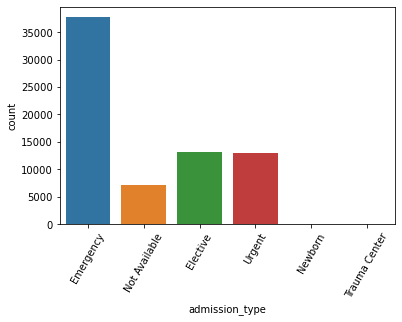

In [216]:
sns.countplot(x='admission_type',data=df)
plt.xticks(rotation=60)
plt.show()

In [217]:
df['admission_type'].value_counts()

Emergency        37740
Elective         13210
Urgent           13024
Not Available     7240
Trauma Center       13
Newborn              6
Name: admission_type, dtype: int64

* __medical_specialty__ -> clean ❗

Medical specialty on which the patient was admitted

In [218]:
df['medical_specialty'].value_counts(dropna=False)

?                                34920
InternalMedicine                 10292
Emergency/Trauma                  5319
Family/GeneralPractice            5217
Cardiology                        3715
                                 ...  
Speech                               1
Proctology                           1
SportsMedicine                       1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 69, dtype: int64

In [219]:
df['medical_specialty']=df['medical_specialty'].replace('?',np.nan)
# Replace '?' with np.nan

df['medical_specialty'].value_counts(dropna=False)

NaN                              34920
InternalMedicine                 10292
Emergency/Trauma                  5319
Family/GeneralPractice            5217
Cardiology                        3715
                                 ...  
Pediatrics-InfectiousDiseases        1
Speech                               1
Pediatrics-EmergencyMedicine         1
Proctology                           1
Neurophysiology                      1
Name: medical_specialty, Length: 69, dtype: int64

In [220]:
set(df['medical_specialty'])

{'AllergyandImmunology',
 'Anesthesiology',
 'Anesthesiology-Pediatric',
 'Cardiology',
 'Cardiology-Pediatric',
 'DCPTEAM',
 'Dentistry',
 'Emergency/Trauma',
 'Endocrinology',
 'Endocrinology-Metabolism',
 'Family/GeneralPractice',
 'Gastroenterology',
 'Gynecology',
 'Hematology',
 'Hematology/Oncology',
 'Hospitalist',
 'InfectiousDiseases',
 'InternalMedicine',
 'Nephrology',
 'Neurology',
 'Neurophysiology',
 'Obsterics&Gynecology-GynecologicOnco',
 'Obstetrics',
 'ObstetricsandGynecology',
 'Oncology',
 'Ophthalmology',
 'Orthopedics',
 'Orthopedics-Reconstructive',
 'Osteopath',
 'Otolaryngology',
 'OutreachServices',
 'Pathology',
 'Pediatrics',
 'Pediatrics-AllergyandImmunology',
 'Pediatrics-CriticalCare',
 'Pediatrics-EmergencyMedicine',
 'Pediatrics-Endocrinology',
 'Pediatrics-Hematology-Oncology',
 'Pediatrics-InfectiousDiseases',
 'Pediatrics-Neurology',
 'Pediatrics-Pulmonology',
 'PhysicalMedicineandRehabilitation',
 'PhysicianNotFound',
 'Podiatry',
 'Proctology',
 '

- **Either drop or consider grouping**


- Medical Specialties (Group):

Allergy and Immunology
Anesthesiology
Anesthesiology-Pediatric
Cardiology
Cardiology-Pediatric
Endocrinology
Endocrinology-Metabolism
Gastroenterology
Hematology
Hematology/Oncology
InfectiousDiseases
Nephrology
Neurology
Neurophysiology
Oncology
Ophthalmology
Orthopedics
Orthopedics-Reconstructive
Otolaryngology
Pediatrics
Pediatrics-AllergyandImmunology
Pediatrics-CriticalCare
Pediatrics-EmergencyMedicine
Pediatrics-Endocrinology
Pediatrics-Hematology-Oncology
Pediatrics-InfectiousDiseases
Pediatrics-Neurology
Pediatrics-Pulmonology
PhysicalMedicineandRehabilitation
Psychiatry
Psychiatry-Child/Adolescent
Pulmonology
Rheumatology
SportsMedicine
Surgery-Cardiovascular
Surgery-Cardiovascular/Thoracic
Surgery-Colon&Rectal
Surgery-General
Surgery-Neuro
Surgery-Pediatric
Surgery-Plastic
Surgery-Thoracic
Surgery-Vascular
Urology


- Other Specialties (Group):

DCPTEAM
Dentistry
Family/GeneralPractice
Hospitalist
Obstetrics
ObstetricsandGynecology
Obsterics&Gynecology-GynecologicOnco
Osteopath
Podiatry
Proctology
Radiologist
Radiology
Resident
SurgicalSpecialty
Speech
Psychology
OutreachServices


- Uncategorized:

?
PhysicianNotFound

- For now drop!

In [221]:
df = df.drop(columns=['medical_specialty'])

* __average_pulse_bpm__ -> clean ✅

Average pulse of the patient during their stay in the hospital
in beats per minute


In [222]:
df['average_pulse_bpm'].value_counts(dropna=False)

63     951
89     950
109    948
99     946
134    943
      ... 
84     844
80     835
71     832
97     817
127    808
Name: average_pulse_bpm, Length: 80, dtype: int64

In [223]:
df['average_pulse_bpm'].isna().sum()

0

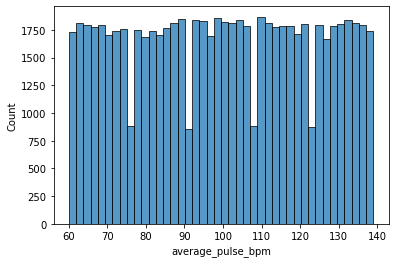

In [224]:
sns.histplot(x='average_pulse_bpm',data=df)
plt.show()

* __discharge_disposition__ -> clean ❗

Destination given to the patient after being discharged

In [225]:
df['discharge_disposition'].value_counts(dropna=False)

Discharged to home                                                                                           42254
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9005
NaN                                                                                                           2590
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Expired                                                                                                       1135
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                      

In [226]:
df['discharge_disposition'] =df['discharge_disposition'].replace(np.nan,'Not Mapped')
# Assign missing values as 'Not Mapped'

- **Possible grouping**
- Home Discharge:

Discharged to home
Discharged/transferred to home under care of Home IV provider
Discharged/transferred to home with home health service
Admitted as an inpatient to this hospital (This could indicate a return to the home after being admitted)


- Facility Transfers:

Discharged/transferred to ICF
Discharged/transferred to SNF
Discharged/transferred to a federal health care facility.
Discharged/transferred to a long-term care hospital.
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
Discharged/transferred to another rehab fac including rehab units of a hospital.
Discharged/transferred to another short-term hospital
Discharged/transferred to another type of inpatient care institution
Discharged/transferred within this institution to Medicare approved swing bed
Neonate discharged to another hospital for neonatal aftercare


- Outpatient Services:

Discharged/transferred/referred another institution for outpatient services
Discharged/transferred/referred to this institution for outpatient services


- Hospice Care:

Hospice / home
Hospice / medical facility
Expired at home. Medicaid only, hospice.
Expired in a medical facility. Medicaid only, hospice.


- Other:

Discharged/transferred/referred to a psychiatric hospital or psychiatric distinct part unit of a hospital
Expired
Left AMA (Against Medical Advice)
Still patient or expected to return for outpatient services


- Uncategorized:

Not Mapped

In [227]:
def map_discharge_group(disposition):
    if pd.isna(disposition):
        return 'Uncategorized'
    elif 'home' in disposition.lower():
        return 'Home Discharge'
    elif 'discharged/transferred to' in disposition.lower():
        return 'Facility Transfers'
    elif 'outpatient' in disposition.lower():
        return 'Outpatient Services'
    elif 'hospice' in disposition.lower() or 'expired' in disposition.lower():
        return 'Hospice Care'
    elif 'psychiatric' in disposition.lower() or 'left ama' in disposition.lower():
        return 'Other'
    else:
        return 'Uncategorized'

# Create a new column for grouped discharge dispositions
df['discharge_disposition'] = df['discharge_disposition'].apply(map_discharge_group)

In [228]:
df['discharge_disposition'].value_counts(dropna=False)

Home Discharge         51604
Facility Transfers     14368
Uncategorized           3328
Hospice Care            1397
Other                    519
Outpatient Services       17
Name: discharge_disposition, dtype: int64

* __admission_source__ -> clean ❗

Source of the patient before being admitted in the current
encounter

In [229]:
df['admission_source'].value_counts(dropna=False)
# Missing value somewhat positively corr with 'admission_type' 

 Emergency Room                                               40317
 Physician Referral                                           20677
NaN                                                            4718
Transfer from a hospital                                       2230
 Transfer from another health care facility                    1562
Clinic Referral                                                 779
 Transfer from a Skilled Nursing Facility (SNF)                 595
HMO Referral                                                    129
 Not Mapped                                                     107
 Not Available                                                   88
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
 Extramural Birth                               

In [230]:
set(df['admission_source'])

{' Court/Law Enforcement',
 ' Emergency Room',
 ' Extramural Birth',
 ' Not Available',
 ' Not Mapped',
 ' Physician Referral',
 ' Sick Baby',
 ' Transfer from Ambulatory Surgery Center',
 ' Transfer from a Skilled Nursing Facility (SNF)',
 ' Transfer from another health care facility',
 ' Transfer from critial access hospital',
 ' Transfer from hospital inpt/same fac reslt in a sep claim',
 'Clinic Referral',
 'HMO Referral',
 'Normal Delivery',
 'Transfer from a hospital',
 nan}

- **Possible Grouping**
- Emergency Services:

Emergency Room
Transfer from critial access hospital


- Referral Sources:

Clinic Referral
HMO Referral
Physician Referral


- Transfers:

Transfer from Ambulatory Surgery Center
Transfer from a Skilled Nursing Facility (SNF)
Transfer from another health care facility
Transfer from hospital inpt/same fac reslt in a sep claim
Transfer from a hospital


- Other:

Court/Law Enforcement
Extramural Birth
Sick Baby
Normal Delivery


- Uncategorized:

Not Available
Not Mapped
nan

In [231]:
df['admission_source'] = df['admission_source'].replace(['Not Mapped','Not Available'],np.nan)

def map_admission_group(source):
    if pd.isna(source):
        return 'Uncategorized'
    elif 'emergency' in source.lower():
        return 'Emergency Services'
    elif 'referral' in source.lower():
        return 'Referral Sources'
    elif 'transfer' in source.lower():
        return 'Transfers'
    else:
        return 'Other'

# Create a new column for grouped admission sources
df['admission_source'] = df['admission_source'].apply(map_admission_group)

In [232]:
# Same procedure as for 'admission_type'
df['admission_source'].value_counts(dropna=False)

Emergency Services    40317
Referral Sources      21585
Uncategorized          4718
Transfers              4404
Other                   209
Name: admission_source, dtype: int64

* __length_of_stay_in_hospital__ -> clean ✅

Number of days between admission and discharge


In [233]:
df['length_of_stay_in_hospital'].value_counts(dropna=False)

3     12434
2     12119
1     10008
4      9656
5      6967
6      5237
7      4154
8      3002
9      2105
10     1637
11     1322
12     1010
13      859
14      723
Name: length_of_stay_in_hospital, dtype: int64

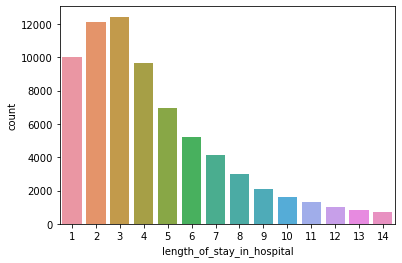

In [234]:
sns.countplot(x='length_of_stay_in_hospital',data=df)
plt.show()

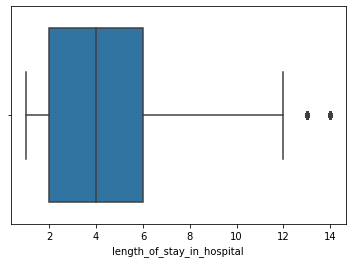

In [235]:
sns.boxplot(x='length_of_stay_in_hospital',data=df)
plt.show()

* __number_lab_tests__ -> clean ✅

Number of lab tests performed during the encounter

In [236]:
df['number_lab_tests'].value_counts(dropna=False)

1      2183
43     1965
44     1787
45     1672
40     1553
       ... 
104       2
118       1
107       1
114       1
121       1
Name: number_lab_tests, Length: 114, dtype: int64

In [237]:
df['number_lab_tests'].isna().sum()

0

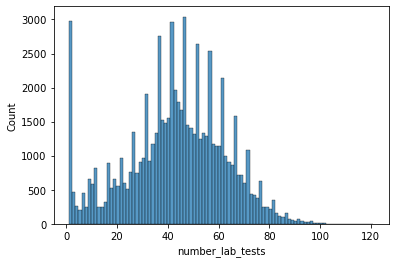

In [238]:
sns.histplot(x='number_lab_tests',data=df)
plt.show()

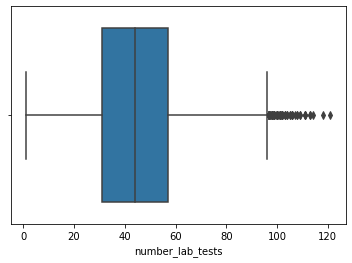

In [239]:
sns.boxplot(x='number_lab_tests',data=df)
plt.show()

* __non_lab_procedures__ -> clean ✅

Number of non-lab procedures performed during the
encounter

In [240]:
df['non_lab_procedures'].value_counts(dropna=False)

0    32632
1    14532
2     8895
3     6614
6     3478
4     2928
5     2154
Name: non_lab_procedures, dtype: int64

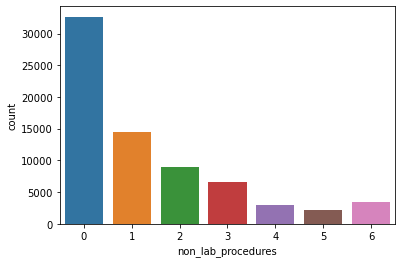

In [241]:
sns.countplot(x='non_lab_procedures',data=df)
plt.show()

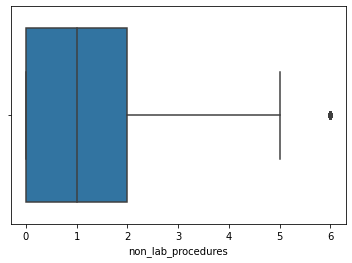

In [242]:
sns.boxplot(x='non_lab_procedures',data=df)
plt.show()

* __number_of_medications__ -> clean ✅

Number of distinct types of medication administered during
the encounter

In [243]:
df['number_of_medications'].value_counts(dropna=False)

13    4315
12    4171
15    4065
11    4051
14    4029
      ... 
69       4
68       3
70       2
75       2
74       1
Name: number_of_medications, Length: 72, dtype: int64

In [244]:
df['number_of_medications'].isna().sum()

0

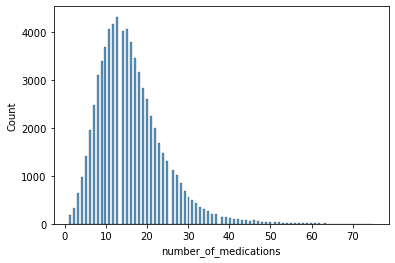

In [245]:
sns.histplot(x='number_of_medications',data=df)
plt.show()

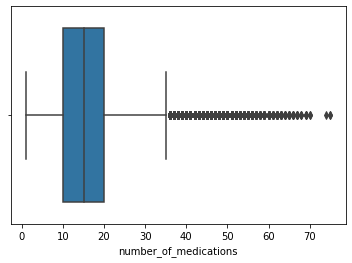

In [246]:
sns.boxplot(x='number_of_medications',data=df)
plt.show()

* __primary_diagnosis__ -> clean ❗

Primary diagnosis (coded as first three digits of ICD9)

In [247]:
df['primary_diagnosis'].value_counts(dropna=False).sort_values()

523          1
131          1
374          1
906          1
250.51       1
          ... 
486       2488
410       2513
786       2846
414       4595
428       4776
Name: primary_diagnosis, Length: 687, dtype: int64

In [248]:
set(df['primary_diagnosis'])

{'10',
 '11',
 '110',
 '112',
 '114',
 '115',
 '117',
 '131',
 '133',
 '135',
 '136',
 '141',
 '142',
 '143',
 '146',
 '147',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '160',
 '161',
 '162',
 '163',
 '164',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '179',
 '180',
 '182',
 '183',
 '184',
 '185',
 '188',
 '189',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '207',
 '208',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '223',
 '225',
 '226',
 '227',
 '228',
 '229',
 '23',
 '230',
 '233',
 '235',
 '236',
 '237',
 '238',
 '239',
 '240',
 '241',
 '242',
 '244',
 '245',
 '246',
 '250',
 '250.01',
 '250.02',
 '250.03',
 '250.1',
 '250.11',
 '250.12',
 '250.13',
 '250.2',
 '250.21',
 '250.22',
 '250.23',
 '250.3',
 '250.31',
 '250.32',
 '250.33',
 '250.4',
 '250.41',
 '250.42',
 '250.43',
 '250.5',
 '250.51',
 '250.52',
 '250.53',
 '250.6',
 

- **Possible Grouping**
- Main Category:

If the code consists entirely of digits, it is considered for grouping into a main category based on the first character or the first two characters.
If the first character is a digit from '1' to '9', it is assigned to the 'Main Category' followed by the first digit.
If the first two characters form a valid number, it is assigned to the 'Main Category' followed by the first two digits.

- Supplementary Classification:

If the code starts with either 'V' or 'E', it is likely a supplementary classification code. These codes are often used for factors influencing health status and encounters for external causes.


- Uncategorized:

If the code does not fit into any of the specified conditions, it is marked as 'Uncategorized'

In [249]:
def map_diagnosis_group(code):
    if pd.isna(code):
        return 'Uncategorized'
    elif code.startswith(('V', 'E')):
        return 'Supplementary Classification'
    elif code.isdigit():
        # Assuming the first character or first two characters represent a category
        first_digit = code[0]
        if first_digit in ('1', '2', '3', '4', '5', '6', '7', '8', '9'):
            return 'Main Category ' + first_digit
        elif code[:2].isdigit():
            return 'Main Category ' + code[:2]
    return 'Uncategorized'

# Create a new column for grouped primary diagnosis codes
df['primary_diagnosis'] = df['primary_diagnosis'].apply(map_diagnosis_group)

In [250]:
df['primary_diagnosis'].value_counts(dropna=False)

Main Category 4                 26795
Main Category 5                 11136
Main Category 7                  9150
Uncategorized                    5951
Main Category 2                  4686
Main Category 9                  2746
Main Category 6                  2661
Main Category 8                  2560
Main Category 3                  2454
Main Category 1                  1939
Supplementary Classification     1155
Name: primary_diagnosis, dtype: int64

* __secondary_diagnosis__ -> clean ❗

Secondary diagnosis (first three digits of ICD9)

In [251]:
df['secondary_diagnosis'].value_counts(dropna=False)

276     4694
428     4685
250     4257
427     3537
401     2624
        ... 
V60        1
E883       1
V11        1
755        1
E938       1
Name: secondary_diagnosis, Length: 699, dtype: int64

In [252]:
df['secondary_diagnosis'] = df['secondary_diagnosis'].apply(map_diagnosis_group)

In [253]:
df['secondary_diagnosis'].value_counts(dropna=False)

Main Category 4                 27606
Main Category 2                 13246
Main Category 5                  9830
Main Category 7                  6151
Uncategorized                    4943
Main Category 3                  2565
Supplementary Classification     1780
Main Category 6                  1644
Main Category 1                  1577
Main Category 9                  1280
Main Category 8                   611
Name: secondary_diagnosis, dtype: int64

* __additional_diagnosis__ -> clean ❗

Additional secondary diagnosis (first three digits of ICD9)

In [254]:
df['additional_diagnosis'].value_counts(dropna=False)

250    8070
401    5783
276    3599
428    3240
427    2767
       ... 
834       1
540       1
271       1
755       1
669       1
Name: additional_diagnosis, Length: 747, dtype: int64

In [255]:
df['additional_diagnosis'] = df['additional_diagnosis'].apply(map_diagnosis_group)

In [256]:
df['additional_diagnosis'].value_counts(dropna=False)

Main Category 4                 24786
Main Category 2                 17389
Main Category 5                  7850
Main Category 7                  5744
Uncategorized                    4865
Supplementary Classification     3541
Main Category 3                  3065
Main Category 6                  1298
Main Category 1                  1155
Main Category 9                  1088
Main Category 8                   452
Name: additional_diagnosis, dtype: int64

* __number_diagnoses__ -> clean ✅

Number of diagnoses entered to the system

In [257]:
df['number_diagnoses'].value_counts(dropna=False)

9     34668
5      7920
8      7375
7      7264
6      7134
4      3902
3      1994
2       727
1       164
16       33
10       15
13       13
12        7
11        7
15        6
14        4
Name: number_diagnoses, dtype: int64

In [258]:
df['number_diagnoses'].dtype

dtype('int64')

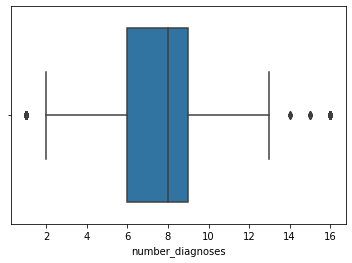

In [259]:
sns.boxplot(x='number_diagnoses',data=df)
plt.show()

* __glucose_test_result__ -> clean ❗

Range of the glucose test results or if the test was not taken.
Values: “>200,” “>300,” “normal,” and “none” if not measured

In [260]:
df['glucose_test_result'].value_counts(dropna=False)

NaN     67545
Norm     1806
>200     1055
>300      827
Name: glucose_test_result, dtype: int64

In [261]:
df['glucose_test_result'] = df['glucose_test_result'].fillna('None')
# Fill missing values according to metadata

In [262]:
df['glucose_test_result'].value_counts(dropna=False)

None    67545
Norm     1806
>200     1055
>300      827
Name: glucose_test_result, dtype: int64

* __a1c_test_result__ -> clean ❗

Range of the A1C test results or if the test was not taken.
Values: “>8” if greater than 8%, “>7” if greater than 7% but
less than 8%, “normal” if less than 7%, and “none” if not
measured.

In [263]:
df['a1c_test_result'].value_counts(dropna=False)

NaN     59317
>8       5705
Norm     3503
>7       2708
Name: a1c_test_result, dtype: int64

In [264]:
df['a1c_test_result'] = df['a1c_test_result'].fillna('None')
# Fill missing values according to metadata

In [265]:
df['a1c_test_result'].value_counts(dropna=False)

None    59317
>8       5705
Norm     3503
>7       2708
Name: a1c_test_result, dtype: int64

* __change_in_meds_during_hospitalization__ -> clean ✅

Indicates if there was a change in diabetic medications
(dosage or generic name). Values: “change” and “no change”

In [266]:
df['change_in_meds_during_hospitalization'].value_counts(dropna=False)

No    38325
Ch    32908
Name: change_in_meds_during_hospitalization, dtype: int64

In [267]:
df['change_in_meds_during_hospitalization'].dtype

dtype('O')

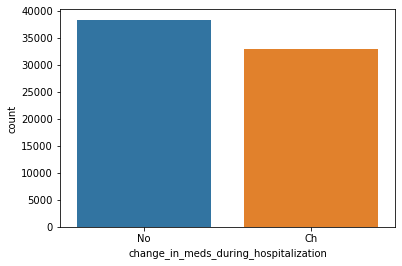

In [268]:
sns.countplot(x='change_in_meds_during_hospitalization',data=df)
plt.show()

* __prescribed_diabetes_meds__ -> clean ✅

Yes if patient has diabetes medication perscribed. No
otherwise.

In [269]:
df['prescribed_diabetes_meds'].value_counts(dropna=False)

Yes    54888
No     16345
Name: prescribed_diabetes_meds, dtype: int64

In [270]:
df['prescribed_diabetes_meds'].dtype

dtype('O')

* __medication__ -> clean ✅

In [271]:
df['medication'].value_counts(dropna=False)
# Empty list -> no medication was prescribed

['insulin']                                                              21715
[]                                                                       16345
['metformin']                                                             3152
['metformin', 'insulin']                                                  3041
['glipizide']                                                             2727
                                                                         ...  
['pioglitazone', 'acarbose']                                                 1
['glipizide', 'rosiglitazone', 'acarbose', 'insulin']                        1
['glipizide', 'glyburide', 'acarbose', 'insulin']                            1
['metformin', 'glimepiride', 'glipizide', 'rosiglitazone', 'insulin']        1
['metformin', 'rosiglitazone', 'acarbose']                                   1
Name: medication, Length: 303, dtype: int64

In [272]:
df['medication'].dtype

dtype('O')

In [273]:
def comma_counter(string):
    commas = 0
    for i in string:
        if i == ',':
            commas += 1
    return commas

In [274]:
# Values in 'medication' column are lists inside strings
# Any list with length larger than 2 is not empty
# Create function to binary classify if person takes medication (1) or not (0)
def map_medication(medication_list):
    if len(medication_list) > 2:
        return 1
    return 0

In [275]:
# Apply function
df['medication'] = df['medication'].apply(map_medication)

In [276]:
# Quantify as category
df['medication'] = df['medication'].astype('category')

In [277]:
df['medication'].value_counts()

1    54888
0    16345
Name: medication, dtype: int64

In [278]:
df.isna().sum()

encounter_id                             0
patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [279]:
df['readmitted_binary'] = df['readmitted_binary'].map({'No': 0, 'Yes': 1})

In [280]:
# Data description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,71233,NaN,NaN,NaN,548793,259699,100000,323120,548350,774051,999980
patient_id,71233,NaN,NaN,NaN,5.43012e+07,3.87962e+07,135,2.33964e+07,4.53056e+07,8.75584e+07,1.89503e+08
race,71233,5,Caucasian,55761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71233,2,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,71233,10,[70-80),20914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,71233,2,1,43033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71233,NaN,NaN,NaN,0.369604,1.28749,0,0,0,0,42
emergency_visits_in_previous_year,71233,NaN,NaN,NaN,0.196257,0.910872,0,0,0,0,76
inpatient_visits_in_previous_year,71233,NaN,NaN,NaN,0.640181,1.26729,0,0,0,1,21
admission_type,71233,6,Emergency,37740,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Prelim Modeling

In [281]:
target_cols = [
    'readmitted_binary',
    'readmitted_multiclass'
]

id_cols = [
    'encounter_id',
    'patient_id'
]

numerical_cols = [
    'average_pulse_bpm',
    'outpatient_visits_in_previous_year',
    'emergency_visits_in_previous_year',
    'inpatient_visits_in_previous_year',
    'length_of_stay_in_hospital',
    'number_lab_tests',
    'non_lab_procedures',
    'number_of_medications',
    'number_diagnoses'
]

updated_categorical_cols = [
    'race',
    'gender',
    'age',  # age bracket
    'payer_code',
    'admission_type',
    'discharge_disposition',
    'admission_source',
    'primary_diagnosis',
    'secondary_diagnosis',
    'additional_diagnosis',
    'glucose_test_result',
    'a1c_test_result',
    'change_in_meds_during_hospitalization',
    'prescribed_diabetes_meds',
    'medication'
]

In [282]:
# Apply moddeling
# Assign explanatory and target variables
X = df.drop(columns=id_cols+target_cols)
y = df['readmitted_binary']

In [283]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 21, 
                                                  stratify = y, 
                                                  shuffle = True)

## Feature Selection

### Preliminary Selection

In [284]:
# Split into categorical and numerical
X_train_num = X_train.drop(columns=updated_categorical_cols)

X_train_cat = X_train.drop(columns=numerical_cols)

# Repeat for Test
X_test_num = X_test.drop(columns=updated_categorical_cols)

X_test_cat = X_test.drop(columns=numerical_cols)

In [285]:
# Normalize the numerical data using the MinMaxScaler
#call function to scale the data
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.41666667, 0.        , 0.        , ..., 0.        , 0.09459459,
        0.53333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.18918919,
        0.4       ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.44594595,
        0.53333333],
       ...,
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.16216216,
        0.46666667],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.36486486,
        0.53333333],
       [0.        , 0.        , 0.04761905, ..., 0.5       , 0.28378378,
        0.53333333]])

In [286]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
32068,0.416667,0.000000,0.000000,0.139241,0.230769,0.591667,0.000000,0.094595,0.533333
50212,0.000000,0.000000,0.000000,0.329114,0.384615,0.533333,0.000000,0.189189,0.400000
10039,0.000000,0.000000,0.000000,0.405063,0.692308,0.475000,0.333333,0.445946,0.533333
12720,0.000000,0.000000,0.000000,0.987342,0.538462,0.491667,0.000000,0.391892,0.533333
44848,0.083333,0.015873,0.047619,0.911392,0.153846,0.325000,0.000000,0.256757,0.533333
...,...,...,...,...,...,...,...,...,...
60366,0.055556,0.000000,0.047619,0.379747,0.000000,0.291667,0.666667,0.283784,0.533333
47641,0.000000,0.000000,0.285714,0.379747,0.000000,0.516667,0.000000,0.040541,0.133333
5019,0.000000,0.000000,0.000000,0.784810,0.384615,0.591667,0.166667,0.162162,0.466667
7430,0.000000,0.000000,0.000000,0.949367,0.230769,0.491667,0.333333,0.364865,0.533333


In [287]:
# Same for test set
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)
X_test_num_scaled.head(3)

,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
14487,0.0,0.0,0.000000,0.860759,0.692308,0.375000,0.5,0.270270,0.466667
19398,0.0,0.0,0.000000,0.772152,0.000000,0.208333,0.0,0.121622,0.533333
29332,0.0,0.0,0.047619,0.696203,0.384615,0.325000,0.0,0.216216,0.533333


In [288]:
# Check for variance in numerical variables
X_train_num_scaled.var().sort_values()

emergency_visits_in_previous_year     0.000204
outpatient_visits_in_previous_year    0.001229
inpatient_visits_in_previous_year     0.003577
number_of_medications                 0.011953
number_diagnoses                      0.016618
number_lab_tests                      0.026789
length_of_stay_in_hospital            0.053131
non_lab_procedures                    0.080653
average_pulse_bpm                     0.085197
dtype: float64

In [289]:
# Heatmap function
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

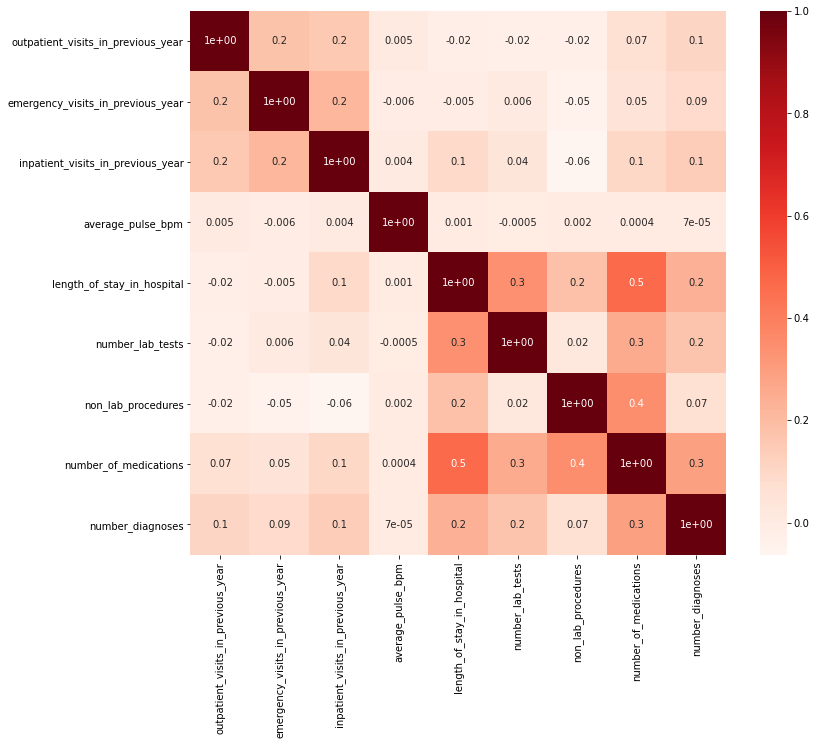

In [290]:
# Observe correlation between numerical variables
cor_heatmap(X_train_num_scaled.corr(method ='spearman'))
# No alarming observations

In [291]:
# Chi-Square for categorical data
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [292]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

race is NOT an important predictor. (Discard race from model)
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
glucose_test_result is NOT an important predictor. (Discard glucose_test_result from model)
a1c_test_result is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


In [293]:
# According to the chi-square test we should discard 'race', 'gender' and 'glucose_test_result'

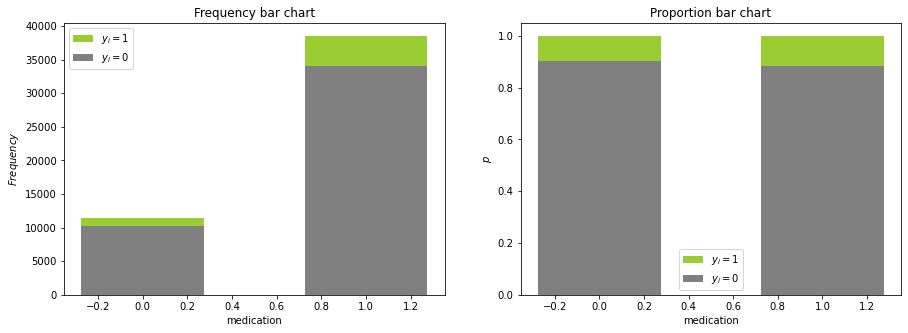

In [294]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "medication", "readmitted_binary")

In [295]:
# The first plot will represent the frequency of each value of the dependent variable in the different categories,
# and the second plot will make this representation more intuitive by checking the proportion of the presence of 
# each label of the depedent variable in each category.

- For Categorical Data -> drop race ; gender ; glucose_test_result

### Wrapper Methods

- **RFE**

Recursive Feature Elimination (RFE / Backwards) will allow to select the most important features to keep. RFE uses a predictive model to run multiple times, always removing the "least important" variable before running again.

In [296]:
log_model = LogisticRegression()

In [297]:
# Using RFE, create a RFE instance called rfe
rfe = RFE(estimator = log_model, n_features_to_select = 3)

In [298]:
# Transform the data using RFE by applying the method fit_transform() to the instance rfe, where X should be assigned to 
# your independent variables and y to the dependent variable and assign it to the object X_rfe
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

In [299]:
# Check the variables that were selected by RFE as the most "important" ones
print(X_train_num_scaled.columns)
print(rfe.support_)

Index(['outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'average_pulse_bpm',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses'],
      dtype='object')
[False  True  True False False False False False  True]


In [300]:
# The ranking of the variables defined by RFE as the most "important" ones
rfe.ranking_

array([3, 1, 1, 6, 2, 7, 5, 4, 1])

In [301]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

outpatient_visits_in_previous_year    False
emergency_visits_in_previous_year      True
inpatient_visits_in_previous_year      True
average_pulse_bpm                     False
length_of_stay_in_hospital            False
number_lab_tests                      False
non_lab_procedures                    False
number_of_medications                 False
number_diagnoses                       True
dtype: bool

In [302]:
# Number of features
nof_list=np.arange(1,10)            
high_score=0

# Variable to store the optimum features
nof=0           
train_score_list =[]
test_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    # Storing results on training data
    test_score = model.score(X_test_rfe,y_test)
    test_score_list.append(test_score)
    
    # Check best score
    if(test_score >= high_score):
        high_score = test_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.888629


In [303]:
# Number of features
nof_list=np.arange(1,10)            
high_score=0

# Variable to store the optimum features
nof=0           
f1_train_score_list =[]
f1_test_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data
    y_pred_train = model.predict(X_train_rfe)
    f1_train_score = f1_score(y_pred_train,y_train)
    f1_train_score_list.append(f1_train_score)
    
    # Storing results on training data
    y_pred_test = model.predict(X_test_rfe)
    f1_test_score = f1_score(y_pred_test,y_test)
    f1_test_score_list.append(f1_test_score)
    
    # Check best score
    if(f1_test_score >= high_score):
        high_score = f1_test_score
        nof = nof_list[n]
print(f"{model} Optimum number of features: %d" %nof)
print(f"{model} Score with %d features: %f" % (nof, high_score))


# Number of features
nof_list=np.arange(1,10)            
high_score=0

# Variable to store the optimum features
nof=0           
f1_train_score_list =[]
f1_test_score_list = []

for n in range(len(nof_list)):
    model = DecisionTreeClassifier()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data
    y_pred_train = model.predict(X_train_rfe)
    f1_train_score = f1_score(y_pred_train,y_train)
    f1_train_score_list.append(f1_train_score)
    
    # Storing results on training data
    y_pred_test = model.predict(X_test_rfe)
    f1_test_score = f1_score(y_pred_test,y_test)
    f1_test_score_list.append(f1_test_score)
    
    # Check best score
    if(f1_test_score >= high_score):
        high_score = f1_test_score
        nof = nof_list[n]
print(f"{model} Optimum number of features: %d" %nof)
print(f"{model} Score with %d features: %f" % (nof, high_score))

LogisticRegression() Optimum number of features: 2
LogisticRegression() Score with 2 features: 0.036261
DecisionTreeClassifier() Optimum number of features: 8
DecisionTreeClassifier() Score with 8 features: 0.145543


- According to RFE using Logistic Regression, the best number of numerical features to use for this data is 6 and we know, from before, that the numerical variables that we should drop are average_pulse_bpm, number_lab_tests and non_lab_procedures

In [304]:
# #no of features
# nof_list=np.arange(1,10)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# train_score_list =[]
# test_score_list = []
# 
# for n in range(len(nof_list)):
#     #call support vector machines classifier
#     model = SVC(kernel = 'linear')
#     
#     #create RFE instance
#     rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
#     
#     #fit and transform for training data, transform for val data
#     X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
#     X_test_rfe = rfe.transform(X_test_num_scaled)
#     
#     model.fit(X_train_rfe,y_train)
#     
#     #storing results on training data
#     train_score = model.score(X_train_rfe,y_train)
#     train_score_list.append(train_score)
#     
#     #storing results on training data
#     test_score = model.score(X_test_rfe,y_test)
#     test_score_list.append(test_score)
#     
#     #check best score
#     if(test_score > high_score):
#         high_score = test_score
#         nof = nof_list[n]
#         
#         #adding mention of variables to keep
#         features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
#         
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

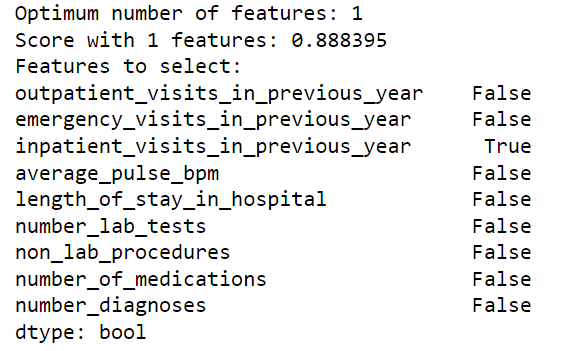

### Embedded Methods

- **Lasso Regression**

In [305]:
# Function to plot the importance of the features
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [306]:
reg = LassoCV()

In [307]:
# Use label encoding to convert categorical values into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [308]:
reg.fit(X_train_num_scaled, y_train_encoded)

LassoCV()

In [309]:
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

outpatient_visits_in_previous_year    0.000000
emergency_visits_in_previous_year     0.000000
inpatient_visits_in_previous_year     0.832773
average_pulse_bpm                    -0.005117
length_of_stay_in_hospital            0.028447
number_lab_tests                      0.001161
non_lab_procedures                   -0.013108
number_of_medications                 0.022983
number_diagnoses                      0.065549
dtype: float64

In [310]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 2 variables


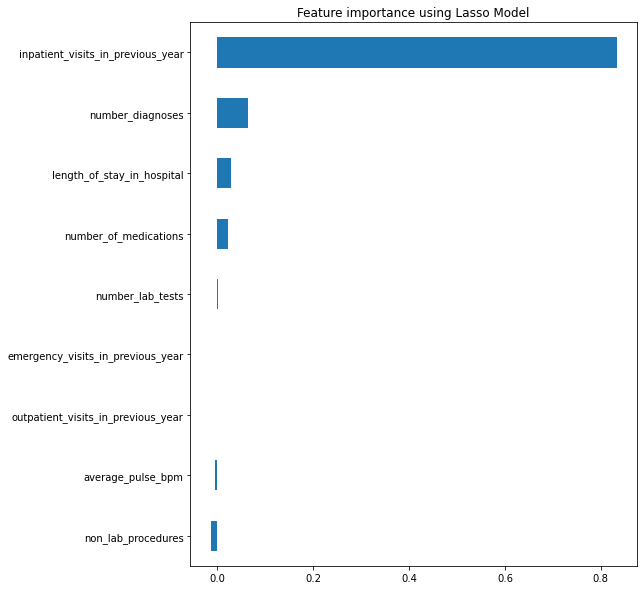

In [311]:
plot_importance(coef,'Lasso')

- According to Lasso, we should remove outpatient_visits_in_previous_year and emergency_visits_in_previous_year (coef == 0)

##  Final Insights on Feature Selection

- **Numerical Data**

| Predictor                        | Spearman | RFE LR | Lasso | What to do? |
| ------------------------------- | -------- | ------ | ----- | ---------------------------------------- |
| outpatient_visits_in_previous_year    | Keep         | Keep       | Remove      | Remove                                         |
| emergency_visits_in_previous_year     | Keep         | Keep       | Remove      | Remove                                         |
| inpatient_visits_in_previous_year     | Keep         | Keep       | Keep      | Include in the model                                     |
| average_pulse_bpm                    | Keep         | Remove       | Keep      | Remove?                                         |
| length_of_stay_in_hospital           | Keep?         | Keep       | Keep      | Include in the model                                       |
| number_lab_tests                     | Keep         | Remove       | Keep      | Remove?                                         |
| non_lab_procedures                   | Keep         | Remove       | Keep      | Remove?                                         |
| number_of_medications                | Keep?         | Keep       | Keep      | Include in the model                                          |
| number_diagnoses                     | Keep         | Keep       | Keep      | Include in the model                                         |


- **Categorical Data**

| Predictor                                | Chi-Square | 
| ---------------------------------------- | ---------- | 
| race                                     | Remove     | 
| gender                                   | Remove     | 
| age (age bracket)                        | Keep       | 
| payer_code                               | Keep       | 
| admission_type                           | Keep       | 
| discharge_disposition                    | Keep       | 
| admission_source                         | Keep       | 
| primary_diagnosis                        | Keep       | 
| secondary_diagnosis                      | Keep       | 
| additional_diagnosis                     | Keep       | 
| glucose_test_result                      | Remove     | 
| a1c_test_result                          | Keep       | 
| change_in_meds_during_hospitalization   | Keep       | 
| prescribed_diabetes_meds                 | Keep       | 
| medication                               | Keep       | 


In [312]:
df = df.drop(columns=['outpatient_visits_in_previous_year','emergency_visits_in_previous_year',
                      'average_pulse_bpm','number_lab_tests','non_lab_procedures','race',
                     'gender','glucose_test_result'])

# 3. Testing Binary

In [313]:
target_cols = [
    'readmitted_binary',
    'readmitted_multiclass'
]

id_cols = [
    'encounter_id',
    'patient_id'
]

model_numerical_cols = [
    'inpatient_visits_in_previous_year',
    'length_of_stay_in_hospital',
    'number_of_medications',
    'number_diagnoses'
]

model_categorical_cols = [
    'age',  # age bracket
    'payer_code',
    'admission_type',
    'discharge_disposition',
    'admission_source',
    'primary_diagnosis',
    'secondary_diagnosis',
    'additional_diagnosis',
    'a1c_test_result',
    'change_in_meds_during_hospitalization',
    'prescribed_diabetes_meds',
    'medication'
]

In [314]:
encoded_categorical_cols = [
    'age',  # age bracket
    'admission_type',
    'discharge_disposition',
    'admission_source',
    'primary_diagnosis',
    'secondary_diagnosis',
    'additional_diagnosis',
    'a1c_test_result',
    'change_in_meds_during_hospitalization',
    'prescribed_diabetes_meds',
]

# Select the relevant categorical columns
categorical_cols = df[encoded_categorical_cols]

# Use one-hot encoding
df_encoded = pd.get_dummies(categorical_cols, prefix=encoded_categorical_cols)

# Replace the original categorical columns with the encoded ones
df = pd.concat([df.drop(columns=encoded_categorical_cols), df_encoded], axis=1)

In [315]:
df.head()

,encounter_id,patient_id,payer_code,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_of_medications,number_diagnoses,medication,readmitted_binary,readmitted_multiclass,...,additional_diagnosis_Supplementary Classification,additional_diagnosis_Uncategorized,a1c_test_result_>7,a1c_test_result_>8,a1c_test_result_None,a1c_test_result_Norm,change_in_meds_during_hospitalization_Ch,change_in_meds_during_hospitalization_No,prescribed_diabetes_meds_No,prescribed_diabetes_meds_Yes
0,533253,70110,0,2,2,20,8,0,0,>30 days,...,0,0,0,0,1,0,0,1,1,0
1,426224,29775006,0,0,14,25,9,1,0,No,...,0,0,0,0,1,0,0,1,0,1
2,634063,80729253,0,1,6,22,6,1,0,No,...,0,0,0,0,1,0,1,0,0,1
3,890610,2919042,1,1,6,9,5,0,0,No,...,0,0,0,0,1,0,0,1,1,0
4,654194,84871971,1,0,6,15,9,0,0,>30 days,...,0,0,0,0,1,0,0,1,1,0


In [316]:
X = df.drop(columns=id_cols+target_cols)
y = df['readmitted_binary']

In [317]:
df['readmitted_binary'].value_counts()

0    63283
1     7950
Name: readmitted_binary, dtype: int64

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                                    random_state = 21,stratify = y,shuffle = True)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                                    random_state = 21)

In [320]:
scaler = StandardScaler()

X_train[model_numerical_cols] = scaler.fit_transform(X_train[model_numerical_cols])
X_test[model_numerical_cols] = scaler.transform(X_test[model_numerical_cols])

In [321]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test,y_pred)
display(cm)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f1)

[0 0 0 ... 0 0 0]


array([[18955,    41],
       [ 2335,    39]], dtype=int64)

0.031784841075794615


In [322]:
log_model.score(X_train,y_train)

0.8879329362453121

### Tree Model

In [323]:
# Create the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_tree_model.predict(X_test)

# Print classification report or other metrics
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18996
           1       0.15      0.16      0.15      2374

    accuracy                           0.80     21370
   macro avg       0.52      0.52      0.52     21370
weighted avg       0.81      0.80      0.81     21370



In [325]:
# Apply SMOTE to the training data to correct for target variable imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the SMOTE-transformed training data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_tree_model.predict(X_test)

# Print classification report or other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     18996
           1       0.21      0.10      0.14      2374

    accuracy                           0.86     21370
   macro avg       0.55      0.53      0.53     21370
weighted avg       0.82      0.86      0.84     21370



In [ ]:
# Create the AdaBoost classifier using the best decision tree as the base estimator
adaboost_model = AdaBoostClassifier(estimator=best_tree_model, n_estimators=100, random_state=42)

# Fit the AdaBoost model to the SMOTE-transformed training data
adaboost_model.fit(X_train, y_train)

# Evaluate the AdaBoost model on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

print("Classification Report for AdaBoost Model:")
print(classification_report(y_test, y_pred_adaboost))

In [ ]:
X_train

In [ ]:
#numberK_list=np.arange(1,21)
#high_score=0
#nof=0           
#score_list_train =[]
#score_list_test =[]
#for n in numberK_list:
#    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_enc, y_train_enc)
#    score_train = model.score(X_train_enc, y_train_enc)
#    score_test = model.score(X_test_enc, y_test_enc)
#    score_list_train.append(score_train)
#    score_list_test.append(score_test)
#    
#    if(score_test>high_score):
#        high_score = score_test
#        nof = numberK_list[n-1]
#print("Best number of neighbors: %d" %nof)
#print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
#print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

- Correct target variable class imbalance

In [ ]:
# Lets try oversampling to correct target variable imbalance
smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X_train_enc, y_train_enc)

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_resampled,y_resampled)
y_pred = tree_model.predict(X_test_enc)
print(y_pred)
cm = confusion_matrix(y_test_enc,y_pred)
display(cm)
f1 = f1_score(y_test_enc, y_pred)
print(f1)

### Class Weights

In [ ]:
# Using class weights

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
class_weight = dict(zip(np.unique(y_train), class_weights))

In [ ]:
tree_model_balanced = DecisionTreeClassifier(class_weight=class_weight, random_state=21)
tree_model_balanced.fit(X_train_enc,y_train_enc)
y_pred = tree_model_balanced.predict(X_test_enc)
print(y_pred)
cm = confusion_matrix(y_test_enc,y_pred)
display(cm)
f1 = f1_score(y_test_enc, y_pred)
print(f1)
print(accuracy_score(y_test_enc, y_pred))

- Ensemble Learning 

In [ ]:
vot_hard = VotingClassifier(estimators=([('DT',DecisionTreeClassifier()),('LR',LogisticRegression(max_iter=1000)),('KNN',KNeighborsClassifier())]))

In [ ]:
vot_hard.fit(X_train_enc,y_train_enc)

In [ ]:
y_pred_vote = vot_hard.predict(X_test_enc) 

In [ ]:
cm_vote = confusion_matrix(y_test_enc,y_pred_vote)
display(cm_vote)
f1_vote = f1_score(y_test_enc, y_pred_vote)
print(f1_vote)

In [ ]:
print('Accuracy is:', accuracy_score(y_test_enc,y_pred_vote))

print('Precision is:', precision_score(y_test_enc, y_pred_vote))

print('Recall is:', recall_score(y_test_enc, y_pred_vote))

print('F1-Score is:', f1_score(y_test_enc, y_pred_vote))

In [ ]:
ada = AdaBoostClassifier(estimator=tree_model_balanced)

In [ ]:
ada.fit(X_train_enc,y_train_enc)

In [ ]:
y_pred_ada = ada.predict(X_test_enc) 

In [ ]:
print('Accuracy is:', accuracy_score(y_test_enc,y_pred_ada))

print('Precision is:', precision_score(y_test_enc, y_pred_ada))

print('Recall is:', recall_score(y_test_enc, y_pred_ada))

print('F1-Score is:', f1_score(y_test_enc, y_pred_ada))

In [ ]:
grad = GradientBoostingClassifier()

In [ ]:
grad.fit(X_train_enc,y_train_enc)

In [ ]:
y_pred_grad = grad.predict(X_test_enc)

In [ ]:
print('Accuracy is:', accuracy_score(y_test_enc,y_pred_grad))

print('Precision is:', precision_score(y_test_enc, y_pred_grad))

print('Recall is:', recall_score(y_test_enc, y_pred_grad))

print('F1-Score is:', f1_score(y_test_enc, y_pred_grad))

# --Visualizations--

In [ ]:
msno.bar(original)

In [ ]:
msno.heatmap(original)

In [ ]:
sns.heatmap(original.corr(),annot=True)
plt.show()

In [ ]:
# Visualize the distributions for numerical values
# Calculate the number of rows and columns in the grid
numerical_df: pd.DataFrame = original[numerical_cols].replace("?", np.nan).copy()
num_cols_per_row = 3
num_cols = len(numerical_cols)
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

# Create subplots for each column in the list
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    sns.histplot(numerical_df[col], ax=axes[row, col_idx])  # You can customize plot settings as needed

# Remove empty subplots (if the number of subplots is not a multiple of num_cols_per_row)
if num_cols % num_cols_per_row != 0:
    for i in range(num_cols, num_rows * num_cols_per_row):
        fig.delaxes(axes[i // num_cols_per_row, i % num_cols_per_row])

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(numerical_df)
plt.show()

In [ ]:
categorical_df: pd.DataFrame = original[categorical_cols].replace("?", np.nan).copy()
for cat in [
    'country',
    'race',
    'gender',
    'age',  # age bracket
    'weight', # weight bracket
    'payer_code',
    'admission_type',
    'glucose_test_result',
    'a1c_test_result',
    'change_in_meds_during_hospitalization',
    'prescribed_diabetes_meds',
]:
    sns.catplot(data=categorical_df,kind='count',x=cat)
    plt.show()